# FBB the notebook is neat, cosing is fine (watch PEP8 violations) but there is no analysis! Nowehere you comment on the meaning of what you are finding! why do you find different slopes when you fit the data differently? the slopes are different if you force the fit to go through 0, if yo uinclude the origin (0,0) as a datum, and if you did not. Which of those lines is most similar to the one you fit to all data? why?

# In the conclusions you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)

# look for more comments int he cells containing FBB

## Assignment 2: Line fitting and data munging with income gender bias.


## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)


In [4]:
import numpy 
import pylab as pl
import pandas as pd
from pandas.tools.plotting import lag_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
#The gender gap(non mandatory viewing)
#from IPython.display import YouTubeVideo
#YouTubeVideo("G_ikzQM93W8")

### 1. Create two python dictionaries to store data.

In [5]:
allmales = {'all':[], 'white':[], 'black':[], 'hispanic':[], 'asian':[]}
allfemales = {'all':[], 'white':[], 'black':[], 'hispanic':[], 'asian':[]}

### download and store data

In [94]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [6]:
# FBB while hard coding the names in work ok 
# you could have written a loop that would assamble the names from the pieces
# FBB dont let the lines of code be onger than the notebook cells
allmales['all'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls', 
                                header = 9) 
allmales['white'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls', 
                                  header = 9)
allmales['black'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls', 
                                  header = 9)
allmales['asian'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls', 
                                  header = 9)
allmales['hispanic'] = pd.read_excel(
    'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls',   
                                     header = 9) 

In [7]:
allfemales['all'] = pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls', 
                                  header = 9) 
allfemales['white'] = pd.read_excel(
    'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls', 
                                    header = 9)
allfemales['black'] = pd.read_excel(
    'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls', 
                                    header = 9)
allfemales['asian'] = pd.read_excel(
    'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls', 
                                    header = 9)
allfemales['hispanic'] = pd.read_excel(
    'http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls', 
                                       header = 9) 

In [111]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


### Descriptive phase

In [100]:
#for k,v in allfemales.items(): #(k for key and v for value!)
    #print("#####", k)
    #print(v.describe())
#for k,v in allmales.items():
    #print("#####", k)
    #print(v.describe())  # There are many NANs!

### 2. Exploratory phase

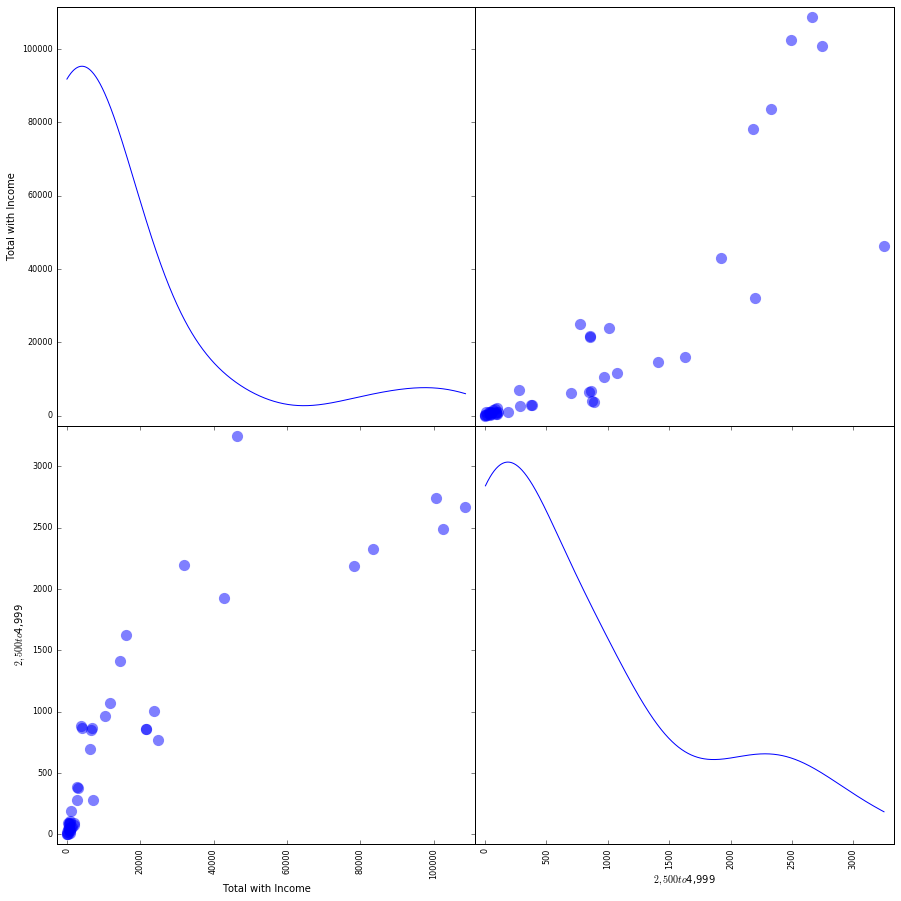

In [7]:
# only columns containing real numerical values are plotted with scatter_matrix. For example:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 0, s=500, figsize=(15,15), 
                        diagonal='kde')     

# FBB missing caption

In [112]:
# Our we can figure it out by reading the data..."some cloumns are missing!"
#print (allmales['all'].shape)
#allmales['all'].applymap(np.isreal).sum()

### Remove those non real values from the original dataset

In [12]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/Users/YueCai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


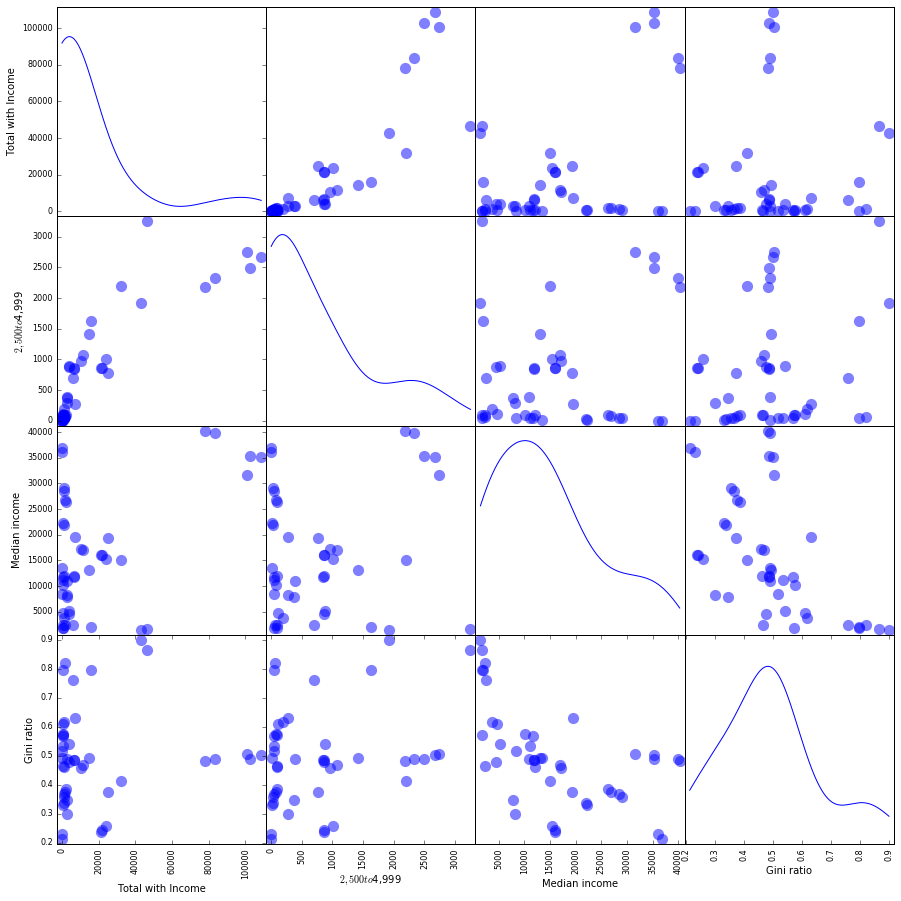

In [19]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 0, s=500, figsize=(15,15), 
                        diagonal='kde')  # this is different from In [7] 

# FBB missing caption

### DO the same plot for all females

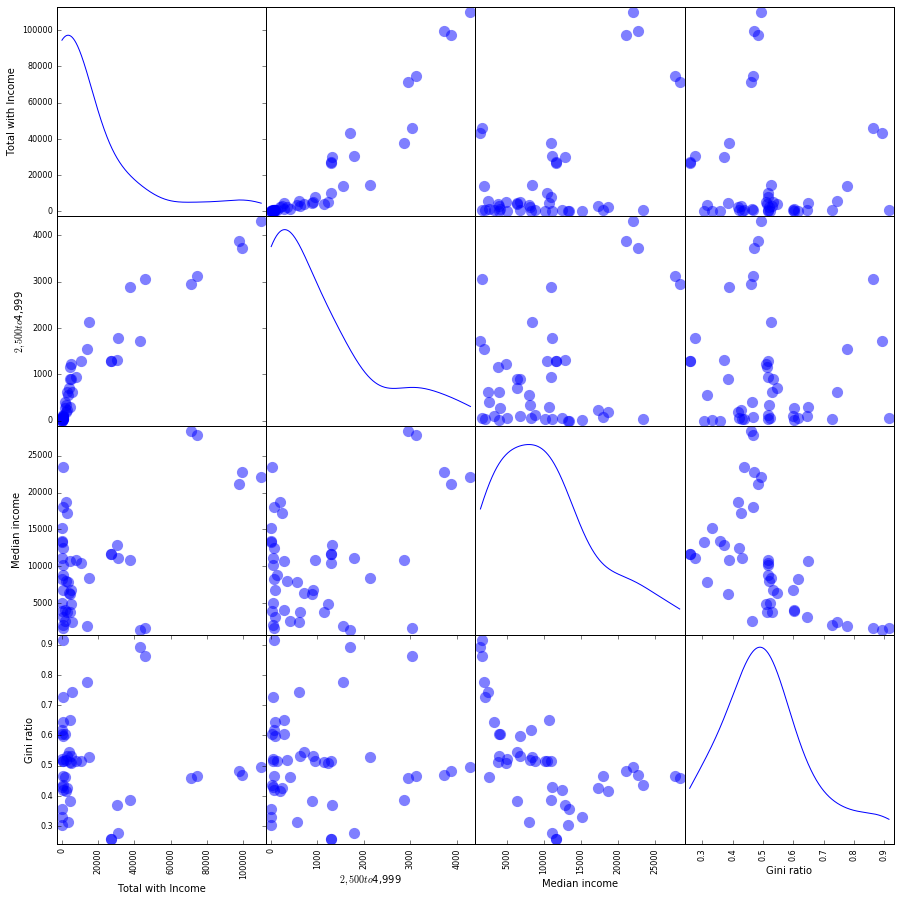

In [24]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 0, s=500, figsize=(15,15), 
                        diagonal='kde') # kernel density estimation

# FBB missing caption

### 3. Find the correlations and plot 1-1 line 

### select data

In [13]:
dfM = []
dfM.append(allmales['all']['Median income'][1])
dfM.append(allmales['white']['Median income'][1])
dfM.append(allmales['black']['Median income'][1])
dfM.append(allmales['asian']['Median income'][1])
dfM.append(allmales['hispanic']['Median income'][1])
dfM

[35228.0, 40122.0, 24855.0, 40153.0, 25411.0]

In [14]:
dfF = []
dfF.append(allfemales['all']['Median income'][1])
dfF.append(allfemales['white']['Median income'][1])
dfF.append(allfemales['black']['Median income'][1])
dfF.append(allfemales['asian']['Median income'][1])
dfF.append(allfemales['hispanic']['Median income'][1])
dfF

# FBB there should be no outputs without decription or explaination in your final version

[22063.0, 23780.0, 20044.0, 24840.0, 17762.0]

### plot line

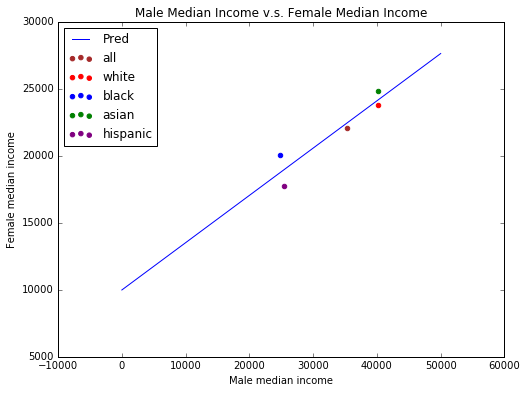

In [90]:
# FBB dont let the lines of code be onger than the notebook cells

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(allmales['all']['Median income'][1], 
           allfemales['all']['Median income'][1], color="brown", marker="o", label= 'all')
ax.scatter(allmales['white']['Median income'][1], 
           allfemales['white']['Median income'][1], color="red", marker="o",label= 'white' )
ax.scatter(allmales['black']['Median income'][1], 
           allfemales['black']['Median income'][1], color="blue", marker="o",label= 'black' )
ax.scatter(allmales['asian']['Median income'][1], 
           allfemales['asian']['Median income'][1], color="green", 
           marker="o",label= 'asian' )
ax.scatter(allmales['hispanic']['Median income'][1], 
           allfemales['hispanic']['Median income'][1], color="purple", 
           marker="o",label= 'hispanic' )

def linear(x, a, b):
    return a+b*x
params = np.polyfit(dfM, dfF, 1)
pl.plot(x,line(x,params[1],params[0]), label='Pred')

pl.xlabel("Male median income")
pl.ylabel("Female median income")
pl.title("Male Median Income v.s. Female Median Income")
pl.legend(loc='best')

# FBB missing figure caption
# missing x=y line for comparison

In [ ]:
import statsmodels.api as sm
# FBB move all imports to the top
est = sm.OLS(dfF, dfM).fit()
est.summary()

### 4. Now fit the data with a line.

In [20]:
#analytical solution for the OLS 

from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1
# FBB there should be no outputs without decription or explaination in your final version

(2224.3609760454674, 0.57394829035421091)

In [21]:
import statsmodels.api as sm

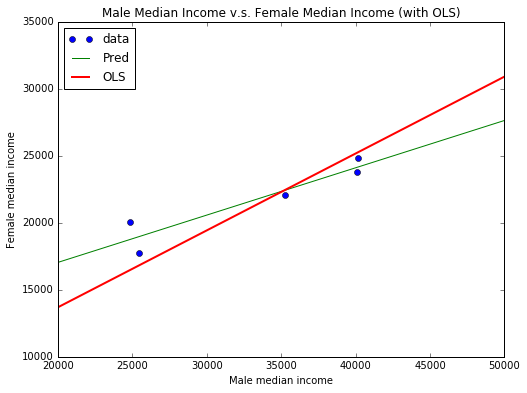

In [92]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(dfM, dfF, 'o',label="data")
def linear(x, a, b):
    return a+b*x
params = np.polyfit(dfM, dfF, 1)
pl.plot(x,line(x,params[1],params[0]), label='Pred')

def line (x, beta0, beta1):
    return beta0 + beta1 * x
x = np.arange(20000,50000)
ax.plot(x,line(x, beta0, beta1), label="OLS",linewidth=2 )

pl.xlabel("Male median income")
pl.ylabel("Female median income")
pl.title("Male Median Income v.s. Female Median Income (with OLS)")
pl.legend(loc='best');

# FBB missing figure caption! The figures should be explaoned! why do you find two different slopes?? what does it mean?

### 5. Compare with all forms of median incomes in the dataset

In [45]:
import numpy 
import pylab as pl
import pandas as pd
from pandas.tools.plotting import lag_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [52]:
#all_males_allincomes[mask]

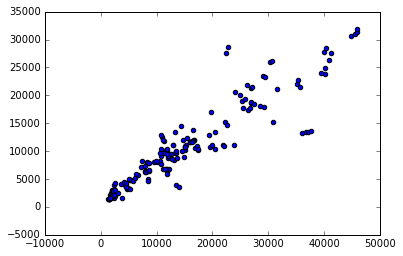

In [53]:
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask])

# FBB missing caption, missing axis labels, figures should be explained or dropped

In [54]:
from scipy import stats
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_1 = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_1 = all_females_allincomes[mask].mean() - beta1_1 * all_males_allincomes[mask].mean()
beta0_1, beta1_1

(1293.7640487731387, 0.62234483903975324)

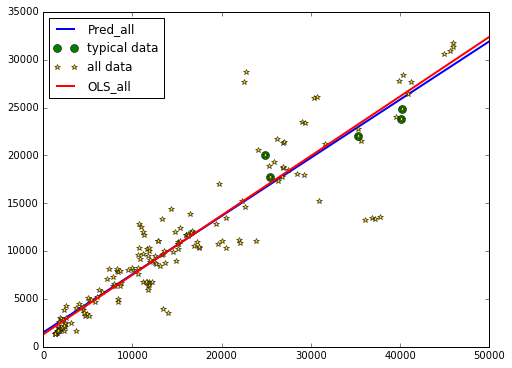

In [88]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(8,6))

def linear(x, a, b):
    return a+b*x
params_1 = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask], 1)
pl.plot(x,line(x,params_1[1],params_1[0]), label='Pred_all', linewidth=2)

ax.plot(dfM, dfF, 'o', label="typical data", markersize = 8)
ax.plot(all_males_allincomes[mask], all_females_allincomes[mask], '*',color= 'gold', label="all data")

def line (x, beta0_1, beta1_1):
    return beta0_1 + beta1_1 * x
x = np.arange(0,50000) 
pl.plot(x,line(x, beta0_1, beta1_1),'r-', label="OLS_all",linewidth=2 )

ax.legend(loc='best');

# FBB missing caption: there is no discussion of the results anywhere, where is the science??!?

### 6. PREDICTION

In [102]:
male_income = 100
female_income = line(male_income,beta0_1, beta1_1)
female_income

1916.1088878128919

In [104]:
male_income = 100
female_income = line(male_income,params_1[1],params_1[0])
female_income

1553.9414935063865

### 7. Comments on race

### Income differences between famles and males are almost everythere, regardless of race. From above prediction figure, we can tell white and asian are the races that females and males are paid apparently unequally. Black famles/males and hispanic famles/males are less being treated differently, in terms of payment. 

# FBB  ethnicity is covariant with income, which may invalidate the analysis (see my solution)¶
